### Megan Hoeksema
### COMP4488
### Data Cleaning Assignment

#### Packages

In [359]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

#### Data Preparation (Training Set)

In [360]:
# Load in the dataset and add column titles
training = pd.read_csv('census_income_train.csv', names = ['age', 'class_of_worker', 'detailed_industry_recode', 
                                                           'detailed_occupation_recode', 'education','wage_per_hour', 
                                                           'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code', 
                                                           'major_occupation_code', 'race', 'hispanic_origin', 
                                                           'sex','member_of_a_labor_union', 'reason_for_unemployment', 
                                                           'full_or_part_time_employment_stat', 'capital_gains', 
                                                           'capital_losses', 'dividends_from_stocks', 'tax_filer_stat', 
                                                           'region_of_previous_residence', 'state_of_previous_residence', 
                                                           'detailed_household_and_family_stat', 
                                                           'detailed_household_summary_in_household', 
                                                           'instance_weight', 'migration_code_change_in_msa', 
                                                           'migration_code_change_in_reg', 'migration_code_move_within_reg',
                                                           'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 
                                                           'num_persons_worked_for_employer','family_members_under_18', 
                                                           'country_of_birth_father', 'country_of_birth_mother', 
                                                           'country_of_birth_self', 'citizenship', 
                                                           'own_business_or_self_employed', 
                                                           'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits', 
                                                           'weeks_worked_in_year', 'year', 'target'], skipinitialspace = True)
# training.head()

In [361]:
# Determine Unique values
columns = list(training.columns)

for col in columns:
    print ('\nCategories for variable %s'%col)
    print (training[col].unique())


Categories for variable age
[73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]

Categories for variable class_of_worker
['Not in universe' 'Self-employed-not incorporated' 'Private'
 'Local government' 'Federal government' 'Self-employed-incorporated'
 'State government' 'Never worked' 'Without pay']

Categories for variable detailed_industry_recode
[ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10]

Categories for variable detailed_occupation_recode
[ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]

Categories for variable education
['High school graduate' 'Some

['Not in universe under 1 year old' 'No' 'Yes']

Categories for variable migration_prev_res_in_sunbelt
['?' 'Yes' 'Not in universe' 'No']

Categories for variable num_persons_worked_for_employer
[0 1 6 4 5 3 2]

Categories for variable family_members_under_18
['Not in universe' 'Both parents present' 'Mother only present'
 'Neither parent present' 'Father only present']

Categories for variable country_of_birth_father
['United-States' 'Vietnam' 'Philippines' '?' 'Columbia' 'Germany' 'Mexico'
 'Japan' 'Peru' 'Dominican-Republic' 'South Korea' 'Cuba' 'El-Salvador'
 'Canada' 'Scotland' 'Outlying-U S (Guam USVI etc)' 'Italy' 'Guatemala'
 'Ecuador' 'Puerto-Rico' 'Cambodia' 'China' 'Poland' 'Nicaragua' 'Taiwan'
 'England' 'Ireland' 'Hungary' 'Yugoslavia' 'Trinadad&Tobago' 'Jamaica'
 'Honduras' 'Portugal' 'Iran' 'France' 'India' 'Hong Kong' 'Haiti'
 'Greece' 'Holand-Netherlands' 'Thailand' 'Laos' 'Panama']

Categories for variable country_of_birth_mother
['United-States' 'Vietnam' '?' 'Columb

In [362]:
# Replace Not in universe with NaN

training = training.replace('Not in universe','', regex=True)

training = training.replace(r'^\s*$', np.nan, regex=True)

# training.head()

In [363]:
# Correcting values

training = training.replace(' ?','', regex=True)

training = training.replace(r'^\s*$', np.nan, regex=True)

In [364]:
# Evaluate missing values per column
missingTrain = training.isna().sum()
print(missingTrain)

age                                               0
class_of_worker                              100245
detailed_industry_recode                          0
detailed_occupation_recode                        0
education                                         0
wage_per_hour                                     0
enroll_in_edu_inst_last_wk                   186943
marital_stat                                      0
major_industry_code                               0
major_occupation_code                        100684
race                                              0
hispanic_origin                                 874
sex                                               0
member_of_a_labor_union                      180459
reason_for_unemployment                      193453
full_or_part_time_employment_stat                 0
capital_gains                                     0
capital_losses                                    0
dividends_from_stocks                             0
tax_filer_st

[Text(0.5, 1.0, 'Missing Data in Training')]

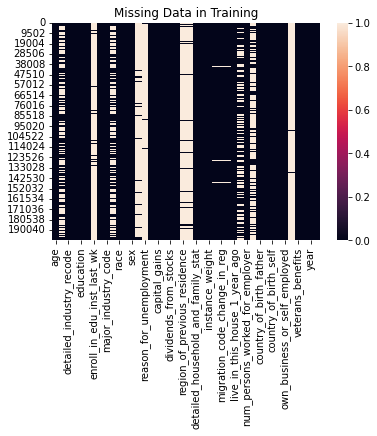

In [365]:
# Visualize the missing values
sns.heatmap(training.isnull()).set(title = 'Missing Data in Training')

In [366]:
# Determine if columns are missing 30% of data (number of instances in training = 199523)

for value in missingTrain: 
    percent = (value/199523) * 100

    print(round(percent,2))

0.0
50.24
0.0
0.0
0.0
0.0
93.69
0.0
0.0
50.46
0.0
0.44
0.0
90.45
96.96
0.0
0.0
0.0
0.0
0.0
92.09
92.09
0.0
0.0
0.0
0.76
0.76
0.76
0.0
42.13
0.0
72.29
0.0
0.0
0.0
0.0
0.0
99.01
0.0
0.0
0.0
0.0


In [367]:
# Drop Columns

training = training.drop(columns=['class_of_worker', 'enroll_in_edu_inst_last_wk', 'major_occupation_code', 
                                  'member_of_a_labor_union', 'reason_for_unemployment', 'region_of_previous_residence',
                                  'state_of_previous_residence', 'migration_prev_res_in_sunbelt', 'family_members_under_18',
                                  'fill_inc_questionnaire_for_veterans_admin'])

training.head()

,age,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,race,hispanic_origin,sex,...,num_persons_worked_for_employer,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,target
0,73,0,0,Highschoolgraduate,0,Widowed,orchildren,White,Allother,Female,...,0,United-States,United-States,United-States,Native-BornintheUnitedStates,0,2,0,95,-50000.
1,58,4,34,Somecollegebutnodegree,0,Divorced,Construction,White,Allother,Male,...,1,United-States,United-States,United-States,Native-BornintheUnitedStates,0,2,52,94,-50000.
2,18,0,0,10thgrade,0,Nevermarried,orchildren,AsianorPacificIslander,Allother,Female,...,0,Vietnam,Vietnam,Vietnam,Foreignborn-NotacitizenofUS,0,2,0,95,-50000.
3,9,0,0,Children,0,Nevermarried,orchildren,White,Allother,Female,...,0,United-States,United-States,United-States,Native-BornintheUnitedStates,0,0,0,94,-50000.
4,10,0,0,Children,0,Nevermarried,orchildren,White,Allother,Female,...,0,United-States,United-States,United-States,Native-BornintheUnitedStates,0,0,0,94,-50000.


In [368]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 32 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   age                                      199523 non-null  int64  
 1   detailed_industry_recode                 199523 non-null  int64  
 2   detailed_occupation_recode               199523 non-null  int64  
 3   education                                199523 non-null  object 
 4   wage_per_hour                            199523 non-null  int64  
 5   marital_stat                             199523 non-null  object 
 6   major_industry_code                      199523 non-null  object 
 7   race                                     199523 non-null  object 
 8   hispanic_origin                          198649 non-null  object 
 9   sex                                      199523 non-null  object 
 10  full_or_part_time_employment_sta

In [370]:
nominal_columns = ['detailed_industry_recode', 
                   'detailed_occupation_recode', 
                   'education', 
                   'marital_stat', 
                   'major_industry_code', 
                   'race', 
                   'hispanic_origin', 
                   'sex',
                   'full_or_part_time_employment_stat', 
                   'dividends_from_stocks', 
                   'tax_filer_stat', 
                   'detailed_household_and_family_stat', 
                   'detailed_household_summary_in_household', 
                   'instance_weight', 
                   'migration_code_change_in_msa', 
                   'migration_code_change_in_reg', 
                   'migration_code_move_within_reg',
                   'live_in_this_house_1_year_ago',
                   'country_of_birth_father', 
                   'country_of_birth_mother', 
                   'country_of_birth_self', 
                   'citizenship', 
                   'own_business_or_self_employed',
                   'veterans_benefits', 
                   'year',
                   'target']

    
for i in nominal_columns:
    training[i] = training[i].astype('category')


In [371]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 32 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   age                                      199523 non-null  int64   
 1   detailed_industry_recode                 199523 non-null  category
 2   detailed_occupation_recode               199523 non-null  category
 3   education                                199523 non-null  category
 4   wage_per_hour                            199523 non-null  int64   
 5   marital_stat                             199523 non-null  category
 6   major_industry_code                      199523 non-null  category
 7   race                                     199523 non-null  category
 8   hispanic_origin                          198649 non-null  category
 9   sex                                      199523 non-null  category
 10  full_or_part_time_em

#### Data Exploration (Training Set)

sex
Female    34.0
Male      32.0
Name: age, dtype: float64


[Text(0.5, 1.0, 'Median Age Per Sex- Training')]

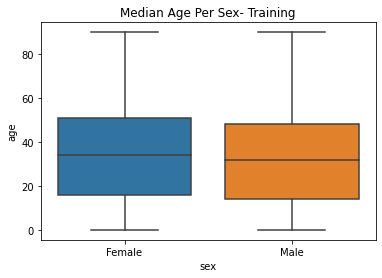

In [372]:
# Plot the median age per sex

#Calculation
medians = training.groupby(['sex'])['age'].median()
print(medians)

#Visulization
box_plot = sns.boxplot(x = "sex", y = "age", data = training).set(title='Median Age Per Sex- Training')
box_plot

[Text(0.5, 1.0, 'Distribution of Race- Training')]

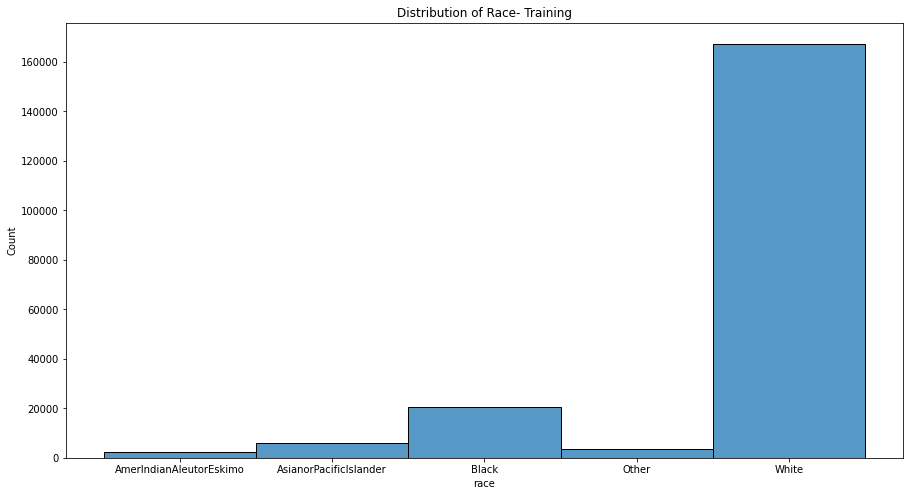

In [373]:
plt.figure(figsize = (15,8))
sns.histplot(training, x="race").set(title='Distribution of Race- Training')

In [374]:
# Descriptive statistics for continuous variables

training.agg([np.mean, np.median, 'min', 'max', np.var, np.std, 'skew'])

/tmp/ipykernel_330/3856961214.py:3: FutureWarning: ['detailed_industry_recode', 'detailed_occupation_recode', 'education', 'marital_stat', 'major_industry_code', 'race', 'hispanic_origin', 'sex', 'full_or_part_time_employment_stat', 'dividends_from_stocks', 'tax_filer_stat', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'instance_weight', 'migration_code_change_in_msa', 'migration_code_change_in_reg', 'migration_code_move_within_reg', 'live_in_this_house_1_year_ago', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 'veterans_benefits', 'year', 'target'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  training.agg([np.mean, np.median, 'min', 'max', np.var, np.std, 'skew'])


,age,wage_per_hour,capital_gains,capital_losses,num_persons_worked_for_employer,weeks_worked_in_year
mean,34.494199,55.426908,4.347190e+02,37.313788,1.956180,23.174897
median,33.000000,0.000000,0.000000e+00,0.000000,1.000000,8.000000
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
max,90.000000,9999.000000,9.999900e+04,4608.000000,6.000000,52.000000
var,497.776045,75568.060368,2.206680e+07,73927.667758,5.593819,595.920755
std,22.310895,274.896454,4.697531e+03,271.896428,2.365126,24.411488
skew,0.373290,8.935097,1.899082e+01,7.632565,0.751561,0.210169


<function matplotlib.pyplot.show(close=None, block=None)>

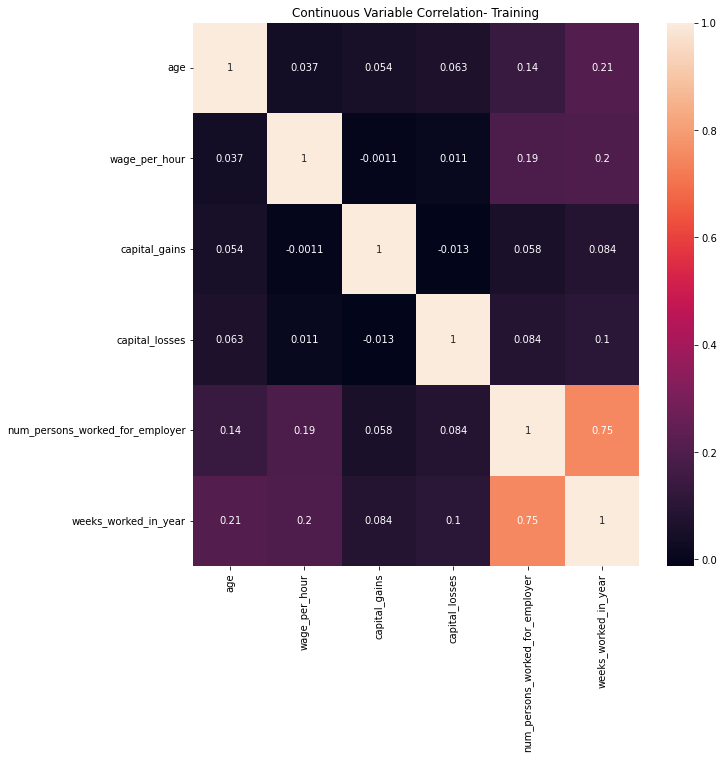

In [375]:
# Correlation Matrix for Continuous Variables

corr_matrix = training.corr()

heatmap = plt.figure(figsize = (10,10))
ax = sns.heatmap(corr_matrix, annot = True).set(title = 'Continuous Variable Correlation- Training')
plt.show

[Text(0.5, 1.0, 'Distribution of Target- Training')]

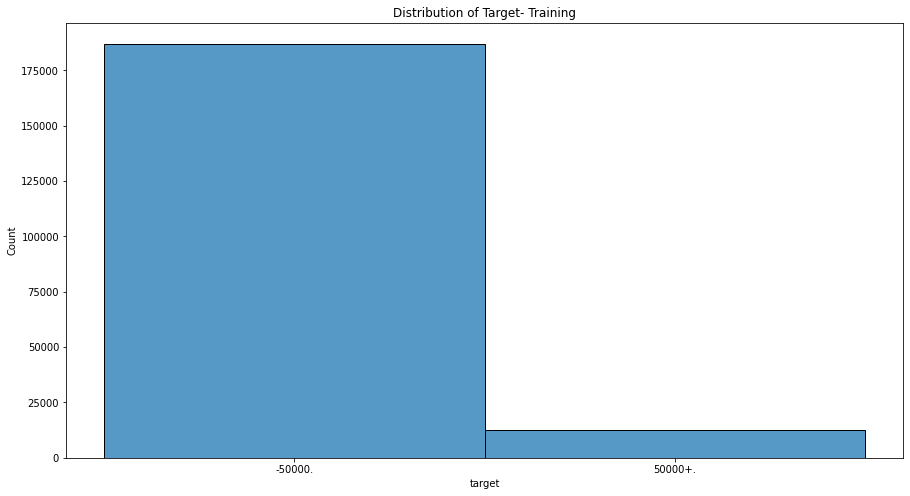

In [376]:
plt.figure(figsize = (15,8))
sns.histplot(training, x="target").set(title='Distribution of Target- Training')

target
-50000.    31.0
50000+.    45.0
Name: age, dtype: float64


[Text(0.5, 1.0, 'Median Age Per Target Value- Training')]

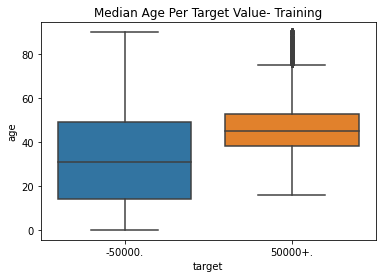

In [377]:
# Plot the median age per target

#Calculation
medians = training.groupby(['target'])['age'].median()
print(medians)

#Visulization
box_plot = sns.boxplot(x = "target", y = "age", data = training).set(title='Median Age Per Target Value- Training')
box_plot

target
-50000.     0.0
50000+.    52.0
Name: weeks_worked_in_year, dtype: float64


[Text(0.5, 1.0, 'Median Weeks Worked Per Year Per Target Value- Training')]

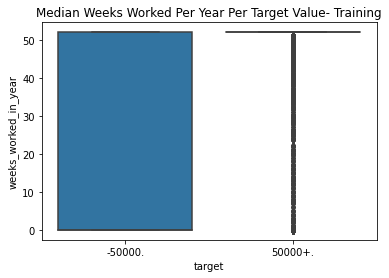

In [399]:
# Plot the median age per target

#Calculation
medians = training.groupby(['target'])['weeks_worked_in_year'].median()
print(medians)

#Visulization
box_plot = sns.boxplot(x = "target", y = "weeks_worked_in_year", data = training).set(
    title='Median Weeks Worked Per Year Per Target Value- Training')

box_plot

#### Data Preparation (Test Set)

In [378]:
# Load in the dataset and add column titles
test = pd.read_csv('census_income_test.csv', names = ['age', 'class_of_worker', 'detailed_industry_recode', 
                                                           'detailed_occupation_recode', 'education','wage_per_hour', 
                                                           'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code', 
                                                           'major_occupation_code', 'race', 'hispanic_origin', 
                                                           'sex','member_of_a_labor_union', 'reason_for_unemployment', 
                                                           'full_or_part_time_employment_stat', 'capital_gains', 
                                                           'capital_losses', 'dividends_from_stocks', 'tax_filer_stat', 
                                                           'region_of_previous_residence', 'state_of_previous_residence', 
                                                           'detailed_household_and_family_stat', 
                                                           'detailed_household_summary_in_household', 
                                                           'instance_weight', 'migration_code_change_in_msa', 
                                                           'migration_code_change_in_reg', 'migration_code_move_within_reg',
                                                           'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 
                                                           'num_persons_worked_for_employer','family_members_under_18', 
                                                           'country_of_birth_father', 'country_of_birth_mother', 
                                                           'country_of_birth_self', 'citizenship', 
                                                           'own_business_or_self_employed', 
                                                           'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits', 
                                                           'weeks_worked_in_year', 'year', 'target'], skipinitialspace = True)

# test.head()

In [379]:
# Determine Unique values
columns = list(test.columns)

for col in columns:
    print ('\nCategories for variable %s'%col)
    print (test[col].unique())


Categories for variable age
[38 44  2 35 49 13  1 61  7 30 85 33 26 46 19 11 23 27  8 29 40 24 45 41
 14 73 78 81 15 68 28 54 37 82 55 77 53 25  0 75 80 10 22 43 48  5 16 18
 50 64  3 72 47 39 51 12 67 59 42  4 32 83 57  6 60 34 20 21 76 71 31 17
 63  9 56 36 65 69 70 62 58 66 74 90 79 89 52 84 87 86 88]

Categories for variable class_of_worker
['Private' 'Self-employed-not incorporated' 'Not in universe'
 'Local government' 'State government' 'Never worked'
 'Self-employed-incorporated' 'Federal government' 'Without pay']

Categories for variable detailed_industry_recode
[ 6 37  0 29  4 45 30 36 33 42 40 47 32 21 35 43 39 22  2 24 38 13 41 34
 15 31  9 12  1 48 19 11 14  8 44 18  7 50 23 27 25 49  3  5 46 16 17 28
 51 20 26 10]

Categories for variable detailed_occupation_recode
[36 12  0  3 34 26 27 29 21 31  2 16 23 28 33 17 32 24 19 25 43  1  8 13
 10 44 30 18 15 42 37 35 40  4 41 22  6 39 38  9 11  7  5 45 20 14 46]

Categories for variable education
['1st 2nd 3rd or 4th grade' '

In [380]:
# Replace Not in universe with NaN

test = test.replace('Not in universe','', regex=True)

test = test.replace(r'^\s*$', np.nan, regex=True)

# test.head()

In [381]:
# Correcting values

test = test.replace(' ?','', regex=True)

test = test.replace(r'^\s*$', np.nan, regex=True)

In [382]:
# Evaluate missing values per column
missingTest = test.isna().sum()
print(missingTest)

age                                              0
class_of_worker                              50079
detailed_industry_recode                         0
detailed_occupation_recode                       0
education                                        0
wage_per_hour                                    0
enroll_in_edu_inst_last_wk                   93424
marital_stat                                     0
major_industry_code                              0
major_occupation_code                        50283
race                                             0
hispanic_origin                                405
sex                                              0
member_of_a_labor_union                      90283
reason_for_unemployment                      96632
full_or_part_time_employment_stat                0
capital_gains                                    0
capital_losses                                   0
dividends_from_stocks                            0
tax_filer_stat                 

[Text(0.5, 1.0, 'Missing Data in Test')]

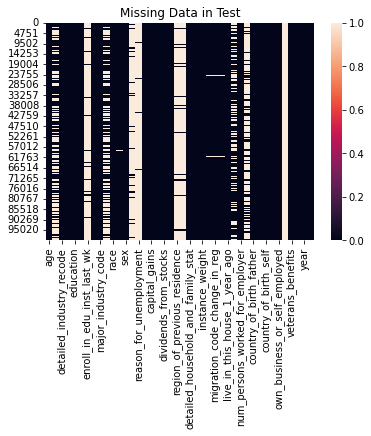

In [383]:
# Visualize the missing values
sns.heatmap(test.isnull()).set(title = 'Missing Data in Test')

In [384]:
# Determine if columns are missing 30% of data (number of instances in test = 99762)

for value in missingTest: 
    percent = (value/99762) * 100

    print(round(percent,2))

0.0
50.2
0.0
0.0
0.0
0.0
93.65
0.0
0.0
50.4
0.0
0.41
0.0
90.5
96.86
0.0
0.0
0.0
0.0
0.0
92.29
92.29
0.0
0.0
0.0
0.72
0.72
0.72
0.0
42.22
0.0
72.57
0.0
0.0
0.0
0.0
0.0
98.97
0.0
0.0
0.0
0.0


In [385]:
# Drop Columns

test = test.drop(columns=['class_of_worker', 'enroll_in_edu_inst_last_wk', 'major_occupation_code', 
                                  'member_of_a_labor_union', 'reason_for_unemployment', 'region_of_previous_residence',
                                  'state_of_previous_residence', 'migration_prev_res_in_sunbelt', 'family_members_under_18',
                                  'fill_inc_questionnaire_for_veterans_admin'])

test.head()

,age,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,race,hispanic_origin,sex,...,num_persons_worked_for_employer,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,target
0,38,6,36,1st2nd3rdor4thgrade,0,Married-civilianspousepresent,Manufacturing-durablegoods,White,Mexican(Mexicano),Female,...,4,Mexico,Mexico,Mexico,Foreignborn-NotacitizenofUS,0,2,12,95,-50000.
1,44,37,12,Associatesdegree-occup/vocational,0,Married-civilianspousepresent,Businessandrepairservices,White,Allother,Female,...,1,United-States,United-States,United-States,Native-BornintheUnitedStates,0,2,26,95,-50000.
2,2,0,0,Children,0,Nevermarried,orchildren,White,Mexican-American,Male,...,0,United-States,United-States,United-States,Native-BornintheUnitedStates,0,0,0,95,-50000.
3,35,29,3,Highschoolgraduate,0,Divorced,Transportation,White,Allother,Female,...,5,United-States,United-States,United-States,Native-BornintheUnitedStates,2,2,52,94,-50000.
4,49,4,34,Highschoolgraduate,0,Divorced,Construction,White,Allother,Male,...,4,United-States,United-States,United-States,Native-BornintheUnitedStates,0,2,50,95,-50000.


In [386]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      99762 non-null  int64  
 1   detailed_industry_recode                 99762 non-null  int64  
 2   detailed_occupation_recode               99762 non-null  int64  
 3   education                                99762 non-null  object 
 4   wage_per_hour                            99762 non-null  int64  
 5   marital_stat                             99762 non-null  object 
 6   major_industry_code                      99762 non-null  object 
 7   race                                     99762 non-null  object 
 8   hispanic_origin                          99357 non-null  object 
 9   sex                                      99762 non-null  object 
 10  full_or_part_time_employment_stat        99762

In [387]:
nominal_columns = ['detailed_industry_recode', 'detailed_occupation_recode', 'education', 'marital_stat', 'major_industry_code',
                   'race', 'hispanic_origin', 'sex', 'full_or_part_time_employment_stat', 'dividends_from_stocks', 
                   'tax_filer_stat', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 
                   'instance_weight', 'migration_code_change_in_msa', 'migration_code_change_in_reg', 
                   'migration_code_move_within_reg','live_in_this_house_1_year_ago','country_of_birth_father', 
                   'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed',
                   'veterans_benefits', 'year','target']
    
for i in nominal_columns:
    test[i] = test[i].astype('category')
    
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   age                                      99762 non-null  int64   
 1   detailed_industry_recode                 99762 non-null  category
 2   detailed_occupation_recode               99762 non-null  category
 3   education                                99762 non-null  category
 4   wage_per_hour                            99762 non-null  int64   
 5   marital_stat                             99762 non-null  category
 6   major_industry_code                      99762 non-null  category
 7   race                                     99762 non-null  category
 8   hispanic_origin                          99357 non-null  category
 9   sex                                      99762 non-null  category
 10  full_or_part_time_employment_stat 

#### Exploratory Data Analysis (Test Set)

sex
Female    34.0
Male      32.0
Name: age, dtype: float64


[Text(0.5, 1.0, 'Median Age Per Sex- Test')]

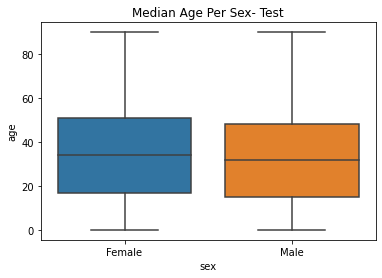

In [388]:
# Plot the median age per sex

#Calculation
medians = test.groupby(['sex'])['age'].median()
print(medians)

#Visulization
box_plot = sns.boxplot(x = "sex", y = "age", data = test).set(title='Median Age Per Sex- Test')
box_plot

[Text(0.5, 1.0, 'Distribution of Race- Test')]

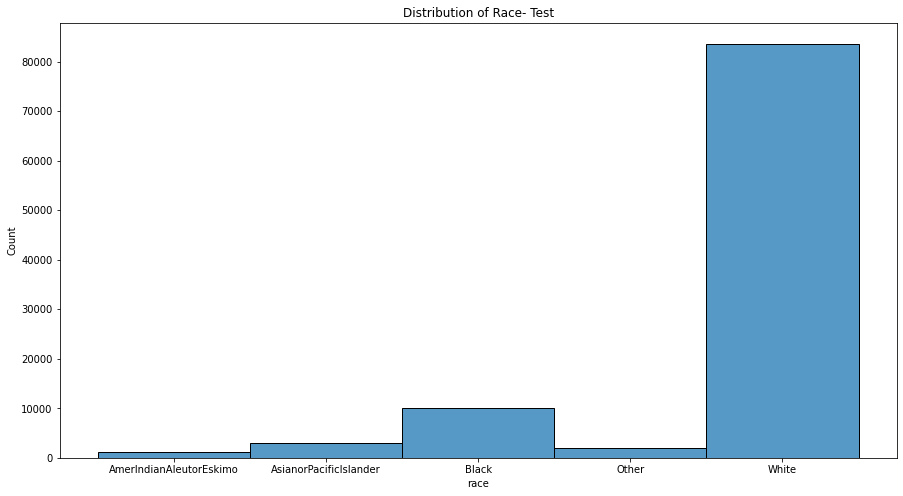

In [389]:
plt.figure(figsize = (15,8))
sns.histplot(test, x="race").set(title='Distribution of Race- Test')

In [390]:
# Descriptive statistics for continuous variables

test.agg([np.mean, np.median, 'min', 'max', np.var, np.std, 'skew'])

/tmp/ipykernel_330/1526452814.py:3: FutureWarning: ['detailed_industry_recode', 'detailed_occupation_recode', 'education', 'marital_stat', 'major_industry_code', 'race', 'hispanic_origin', 'sex', 'full_or_part_time_employment_stat', 'dividends_from_stocks', 'tax_filer_stat', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'instance_weight', 'migration_code_change_in_msa', 'migration_code_change_in_reg', 'migration_code_move_within_reg', 'live_in_this_house_1_year_ago', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 'veterans_benefits', 'year', 'target'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  test.agg([np.mean, np.median, 'min', 'max', np.var, np.std, 'skew'])


,age,wage_per_hour,capital_gains,capital_losses,num_persons_worked_for_employer,weeks_worked_in_year
mean,34.628596,54.461268,4.257886e+02,35.919458,1.956156,23.185331
median,33.000000,0.000000,0.000000e+00,0.000000,1.000000,8.000000
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
max,90.000000,9900.000000,9.999900e+04,4608.000000,6.000000,52.000000
var,498.782939,73009.468318,2.131480e+07,70503.659244,5.590062,594.832313
std,22.333449,270.202643,4.616796e+03,265.525252,2.364331,24.389184
skew,0.371770,8.757473,1.929506e+01,7.795863,0.753843,0.209719


<function matplotlib.pyplot.show(close=None, block=None)>

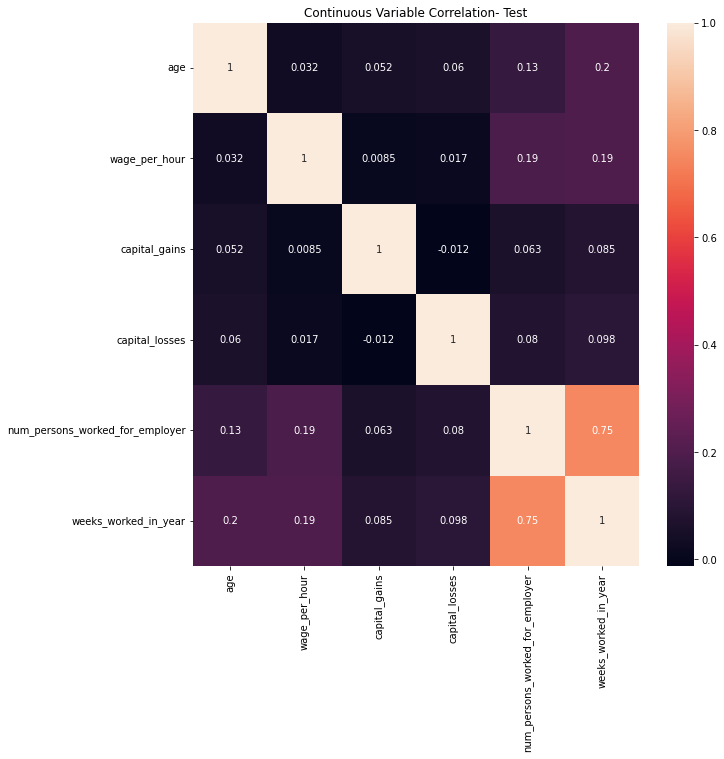

In [391]:
# Correlation Matrix for Continuous Variables

corr_matrix = test.corr()

heatmap = plt.figure(figsize = (10,10))
ax = sns.heatmap(corr_matrix, annot = True).set(title = 'Continuous Variable Correlation- Test')
plt.show

[Text(0.5, 1.0, 'Distribution of Target- Test')]

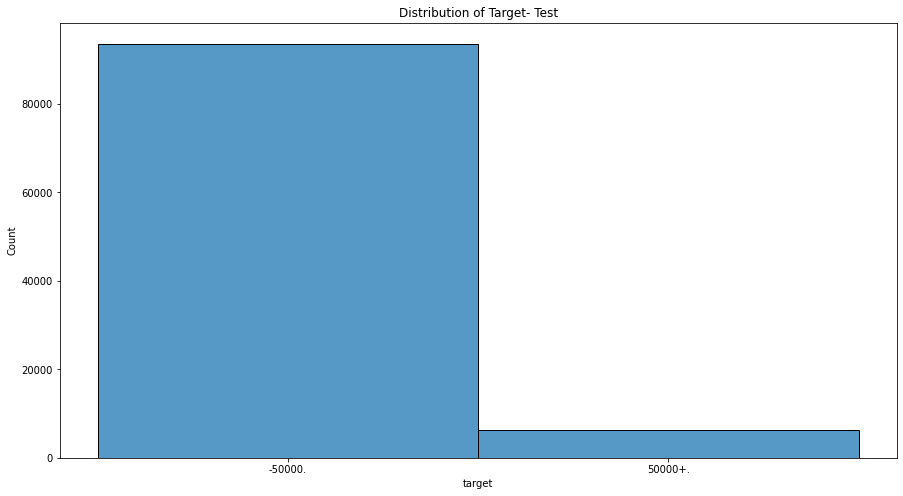

In [392]:
plt.figure(figsize = (15,8))
sns.histplot(test, x="target").set(title='Distribution of Target- Test')

target
-50000.    32.0
50000+.    45.0
Name: age, dtype: float64


[Text(0.5, 1.0, 'Median Age Per Target Value- Test')]

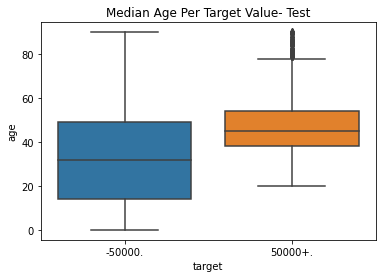

In [393]:
# Plot the median age per target

#Calculation
medians = test.groupby(['target'])['age'].median()
print(medians)

#Visulization
box_plot = sns.boxplot(x = "target", y = "age", data = test).set(title='Median Age Per Target Value- Test')
box_plot

Median Age is higher in 50000+ category

target
-50000.     0.0
50000+.    52.0
Name: weeks_worked_in_year, dtype: float64


[Text(0.5, 1.0, 'Median Weeks Worked Per Year Per Target Value- Test')]

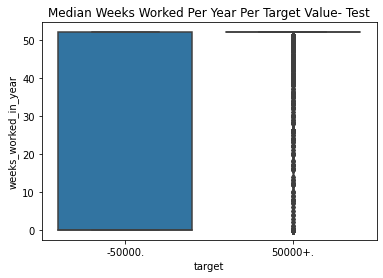

In [400]:
# Plot the median age per target

#Calculation
medians = test.groupby(['target'])['weeks_worked_in_year'].median()
print(medians)

#Visulization
box_plot = sns.boxplot(x = "target", y = "weeks_worked_in_year", data = test).set(
    title='Median Weeks Worked Per Year Per Target Value- Test')
box_plot